In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data_3.xlsx", index_col = 0)    
# all.drop([0], axis=0, inplace=True)

# 컬럼 추출
all2 = all[[ '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

        
# all2 = all2.set_index("DateTime")


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['등락률_ndf'] = ((all2['Mid_ndf']-all2['Mid_ndf'].shift(1))/all2['Mid_ndf'].shift(1))*100
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", '등락률_ndf',"스왑포인트_1월물", "전일종가_ex",'Mid_ndf']] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,...,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,등락률_ndf,스왑포인트_1월물,전일종가_ex,Mid_ndf
열1,,,,,,,,,,,,,,,,,,,,,
1,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,...,-0.04,-0.04,-0.04,-0.03,-0.03,1.75,0.154560,2.50,1126.5,1134.00
2,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,...,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,0.352734,2.40,1131.7,1138.00
3,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,...,0.01,0.00,0.00,0.01,0.01,-9.50,-0.834798,2.40,1134.8,1128.50
4,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,...,0.00,0.00,0.00,-0.01,-0.01,0.50,0.044307,2.50,1129.0,1129.00
5,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,...,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,0.110717,2.40,1128.8,1130.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,...,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,0.256410,-0.60,1313.0,1309.85
2456,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,...,-0.03,-0.02,-0.03,0.01,0.01,1.15,0.087796,-0.70,1313.7,1311.00
2457,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,...,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.038139,-0.55,1307.6,1310.50


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
# #전일 대비 변화량 계산

# df["전일비_ex"] = df["종가_ex"] - df["종가_ex"].shift(1) 
# df["전일비_1Y_irs"] = df["1Y_Mid_irs"] - df["1Y_Mid_irs"].shift(1) 
# df["전일비_2Y_irs"] = df["2Y_Mid_irs"] - df["2Y_Mid_irs"].shift(1) 
# df["전일비_3Y_irs"] = df["3Y_Mid_irs"] - df["3Y_Mid_irs"].shift(1) 
# df["전일비_5Y_irs"] = df["5Y_Mid_irs"] - df["5Y_Mid_irs"].shift(1) 
# df["전일비_10Y_irs"] =df["10Y_Mid_irs"] - df["10Y_Mid_irs"].shift(1) 
# df["전일비_1Y_crs"] = df["1Y_Mid_crs"] - df["1Y_Mid_crs"].shift(1) 
# df["전일비_2Y_crs"] = df["2Y_Mid_crs"] - df["2Y_Mid_crs"].shift(1) 
# df["전일비_3Y_crs"] = df["3Y_Mid_crs"] - df["3Y_Mid_crs"].shift(1) 
# df["전일비_5Y_crs"] = df["5Y_Mid_crs"] - df["5Y_Mid_crs"].shift(1) 
# df["전일비_10Y_crs"] =df["10Y_Mid_crs"] - df["10Y_Mid_crs"].shift(1) 
# df["국고1년대비"] =df["국고1년"]-df["국고1년"].shift(1)
# df["국고3년대비"] =df["국고3년"]-df["국고3년"].shift(1)
# df["국고5년대비"] =df["국고5년"]-df["국고5년"].shift(1)
# df["국고10년대비"] =df["국고10년"]-df["국고10년"].shift(1)
# df["통안364일대비"] = df["통안364일"] - df["통안364일"].shift(1)
# df["통안2년대비"] = df["통안2년"] - df["통안2년"].shift(1)
# df["전일비_1Y_베이시스"] =df["1Y_베이시스"] - df["1Y_베이시스"].shift(1) 
# df["전일비_2Y_베이시스"] =df["2Y_베이시스"] - df["2Y_베이시스"].shift(1) 
# df["전일비_3Y_베이시스"] =df["3Y_베이시스"] - df["3Y_베이시스"].shift(1) 
# df["전일비_5Y_베이시스"] =df["5Y_베이시스"] - df["5Y_베이시스"].shift(1) 
# df["전일비_10Y_베이시스"] =df["10Y_베이시스"] - df["10Y_베이시스"].shift(1) 
# df["전날 종가_ex"] = df["종가_ex"].shift(1)
# df["전날증감률_ex"] = df["증감률_ex"].shift(1)
# df['Mid_ndf'] =(df["Bid_ndf"]+df["Ask_ndf"])/2
# df["종가_NDF차이"] = df["전날 종가_ex"] -df["Mid_ndf"]

# df["전일비_ndf"] = df['Mid_ndf'] -df['Mid_ndf'].shift(1)
# df["등락률_ndf"] = (df['Mid_ndf'] -df['Mid_ndf'].shift(1))/df['Mid_ndf'].shift(1)
# df["M1_스왑포인트"] = df["M1_스왑포인트"]/100
# df = df.set_index("DateTime")
# df = df.dropna()
# df.columns
# df

In [4]:
# "전일종가_ex"

x = df[['1Y_대비_irs', "1Y_대비_crs", "대비_국고10년", '대비_ndf']]
x = x.dropna()
x


,1Y_대비_irs,1Y_대비_crs,대비_국고10년,대비_ndf
열1,,,,
1,-0.03,-0.01,-0.04,1.75
2,-0.03,-0.01,-0.07,4.00
3,0.02,0.00,0.00,-9.50
4,0.01,0.02,0.00,0.50
5,0.01,0.01,-0.02,1.25
...,...,...,...,...
2455,-0.04,-0.08,-0.09,3.35
2456,-0.01,0.01,-0.03,1.15
2457,-0.01,0.01,-0.06,-0.50


In [5]:
# x["1Y_전일비_irs"].iloc[0]
# df.to_excel(excel_writer='시차상관분석2Data.xlsx')
abs(x["대비_ndf"]).mean()


4.326575843838957

In [6]:
x["대비_ndf"].describe()

count    2459.000000
mean        0.066490
std         5.732718
min       -30.750000
25%        -3.300000
50%         0.050000
75%         3.500000
max        31.000000
Name: 대비_ndf, dtype: float64

In [7]:

for i in x.index:
    if x.loc[i,"대비_ndf"] >= 0: 
        #irs crs <0 이므로 상승 국고 > 0 이므로 상승 NDF도 상승
        if x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] >= 0 :
            x.loc[i,"lable"] = 1
            
        #irs crs <0 상승 국고 < 0 하락 추세                
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"]  < 0 and x.loc[i,"대비_국고10년"] < 0 :
            # 값들의 합이 - 이므로 irs 상승 추세가 더 강함  
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  <= 0 : 
                x.loc[i,"lable"] = 1
            # 값들의 합이 - 이므로 상승 추세가 더 강함 국고채의 하락추세가 강함
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  > 0 : 
                # ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단 
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
        
        #irs <0 상승추제 crs == 0 국고 > 0 상승추세이므로 상승            
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] > 0 :
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
            
                    
        #irs < 0 상승 crs == 0 국고 < 0하락추세                  
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] <= 0 :
            # irs가 더 크므로 상승추세
            if x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"]  <= 0:
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
            # 국고채가 더 큼으로 하락ㅇ추세
            elif x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"]  > 0:
                x.loc[i,"lable"] = 0
                                    
        #irs <0 상승추세 crs > 0 하락 추세 국고 > 0 상승 추세
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] > 0  and x.loc[i,"대비_국고10년"] >= 0 :
            # irs의 값이 더 크므로 상승추세
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"]  <= 0:
                x.loc[i,"lable"] = 1
            # crs의 값이 더 크므로 하락추세    
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"]  > 0:
                # crs보다 국고채의 값이 더 큼으로 상승추세
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                    x.loc[i,"lable"] = 1 
                # crs가 국고채의 값이 더 큼으로 하락추세
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :    
                     # 값 절대ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단 
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                             
        #irs <0 상승추세 crs > 0 하락 추세 국고 < 0 하락 추세
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] > 0 and x.loc[i,"대비_국고10년"] < 0 :
            # crs가 irs보다 더 큼으로 하락추세
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] >= 0:
                # 값 절대ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단 
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
             # crs보다 irs가 더 큼으로 상승추세
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] < 0: 
                # irs보다 국고채가 더 큼으로 하락추세
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"] - x.loc[i,"대비_국고10년"] > 0 : 
                    # 값 절대ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():   
                        x.loc[i,"lable"] = 0    
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():  
                        x.loc[i,"lable"] = 1
                # irs가 국고채보다 더 큼으로 상승추세
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"] - x.loc[i,"대비_국고10년"] <= 0 :
                    x.loc[i,"lable"] = 1 
        
        #irs =00  crs < 0 상승 추세 국고 > 0 상승 추세
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] >= 0 :
            x.loc[i,"lable"] = 1
            
        #irs =00  crs < 0 상승 추세 국고 < 0 하락 추세             
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"]  < 0 and x.loc[i,"대비_국고10년"] < 0 :
            # crs가 국고채의 값이 더 큼으로 상승추세
            if x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  <= 0 : 
                x.loc[i,"lable"] = 1
            # crs보다 국고채의 값이 더 큼으로 하락추세    
            elif x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  > 0 :
                # 값 절대ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단  
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                    
        # 국고채가 0보다 큼으로 상승추세           
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] >= 0 :
            x.loc[i,"lable"] = 1
            
        # 국고채가 0보다 큼으로 하락추세                  
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] < 0 :
            # 값 절대ndf 값이 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
        
        #irs ==0 crs 하락추세 국고채 상승추세
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] > 0  and x.loc[i,"대비_국고10년"] >= 0 :
            # crs보다 국고채가 더큼으로 상승추세
            if x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0:
                x.loc[i,"lable"] = 1
            # crs가 국고보다 더큼으로 하락추세    
            if x.loc[i,"1Y_대비_crs"] + x.loc[i,"대비_국고10년"] > 0:
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1               
        
        #irs ==0 crs 하락추세 국고채 하락추세
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] > 0 and x.loc[i,"대비_국고10년"] < 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단    
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
        
        #irs 하락 crs 상승추세 국고채 상승추세            
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] >= 0 :
            # crs가 irs보다 큼으로 상승추세
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"]  <= 0:
                x.loc[i,"lable"] = 1
            # irs가 crs보다 큼으로 하락추세
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] > 0:
                # irs보다 국고채가 더 큼으로 상승추세
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                    x.loc[i,"lable"] = 1 
                # irs가 국고채보다 더 큼으로 하락추세
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :
                    #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단    
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                        
        #irs 하락 crs 상승추세 국고채 하락추세                     
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] < 0 and x.loc[i,"대비_국고10년"] < 0 :
            # crs가 더 크므로 상승추세
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] <= 0 : 
                # crs가 더 크므로 상승추세
               if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                   x.loc[i,"lable"] = 1
                # 국고체가 더 크므로 하락추세
               elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
            # irs가 더크므로 하락추세        
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] > 0 : 
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                    
        #irs 하락추세 국고채 상승 추세
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] >= 0 :
            #국고채가 더 크므로 상승추세
            if x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"] <= 0 :
                x.loc[i,"lable"] = 1
            # irs가 더 크므로 하락추세
            elif x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"] > 0 :
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단    
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                
                
        # irs 하락추세 국고채 하락추세             
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] < 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
                
        #irs 하락 crs 하락추세 국고채 상승추세        
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"]  > 0  and x.loc[i,"대비_국고10년"] > 0 :
            #국고채가 크므로 상승추세
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                x.loc[i,"lable"] = 1
            #irs가 크므루 하락추세
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1              
       
        #irs 하락 crs 하락추세 국고채 하락추세
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"]  > 0  and x.loc[i,"대비_국고10년"] <= 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
            
                     
  
        

In [8]:
for i in x.index:    
    ####### ndf < 0 하락압력                                         
    if x.loc[i,"대비_ndf"] < 0: 
        #irs 상승 crs 상승 <0  국고 > 0 상승
        if x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] >= 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
                
        #irs 상승 crs 상승   국고 하락        
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"]  < 0 and x.loc[i,"대비_국고10년"] < 0 :
            # irs쪽이 더크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] + x.loc[i,"대비_국고10년"]  <= 0 : 
                 #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # 국고채쪽이 더크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  > 0 : 
                x.loc[i,"lable"] = 0
                
        #irs 상승 국고채 상승         
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] >= 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
        
        #irs 상승 국고채 하락                
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] < 0 :
            # irs쪽이 더크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"]  <= 0 : 
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # 국고채쪽이 더크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"]  > 0 : 
                x.loc[i,"lable"] = 0
                    
        #irs 상승 crs 하락 국고 상승
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] > 0  and x.loc[i,"대비_국고10년"] > 0 :
            # irs가 더크므로 상승효과큼 
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"]  <= 0:
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # crs가 더크므로 하락효과          
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] > 0:
                # 국고채가 큼으로 상승효과
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                     #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0 
                # crs가 큼으로 하락효과
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :    
                    x.loc[i,"lable"] = 0
          
        # irs 상승 crs 하락 국고채 하락효과
        elif x.loc[i,"1Y_대비_irs"] < 0 and x.loc[i,"1Y_대비_crs"] > 0 and x.loc[i,"대비_국고10년"] <= 0 :
            # irs더 큼으로 상승효과  
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] <= 0:
                # irs가 큼으로 상승효과
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                    #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0
                #국고채가 더 큼으로 하락압력
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :    
                        x.loc[i,"lable"] = 0
            # crs가 더 큼으로 하락효과
            elif  x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] > 0 : 
                x.loc[i,"lable"] = 0
                
        # crs 상승 국고채 상승
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] > 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1            
        
        # crs 상승 국고채 하락
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"]  < 0 and x.loc[i,"대비_국고10년"] <= 0 :
            # crs가 큼으로 상승효과 
            if x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  <= 0 : 
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # 국고채가 큼으로 하락압력
            elif x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"]  > 0 : 
                x.loc[i,"lable"] = 0
                
        # 국고채 상승압력          
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] > 0 :
            #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
            if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 1
            elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                x.loc[i,"lable"] = 0            
        
        # 국고채 하락압력
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] <= 0 :
            x.loc[i,"lable"] = 0
        
        # crs 하락 국고채 상승
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] > 0  and x.loc[i,"대비_국고10년"] > 0 :
            # 국고채가 더 크므로 상승압력 
            if x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] < 0:
                #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0 
            
            # crs가 더 크므로 하락압력
            elif x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] >= 0:
                x.loc[i,"lable"] = 0
        
        # crs 하락 국고채 하락압력                    
        elif x.loc[i,"1Y_대비_irs"] == 0 and x.loc[i,"1Y_대비_crs"] > 0 and x.loc[i,"대비_국고10년"] <= 0 :
                x.loc[i,"lable"] = 0
        
        # irs 하락 crs 상승 국고채 상승
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] < 0  and x.loc[i,"대비_국고10년"] > 0 :
            # crs가 더 크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"]  <= 0:
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # irs가 더 크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] > 0:
                # 국고채가 더크므로 상승압력
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                    #ndf 절대값이 ndf의 절대값 평균의 값보다 작으면 영향력이 이자율보다 작다고 판단 값이 크면 크다고 판단
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0 
                # irs가 더 크므로 하락압력
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :    
                    x.loc[i,"lable"] = 0
                    
        # irs 하락 crs 상승 국고채 하락                  
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] < 0 and x.loc[i,"대비_국고10년"] <= 0 :
            # crs가 더 크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"]  <= 0 : 
                #crs 가 더크므로 상승압력
                if x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"] - x.loc[i,"대비_국고10년"] <= 0 : 
                    if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 1
                    elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                        x.loc[i,"lable"] = 0
                #국고채가 크므로 하락압력
                elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"] - x.loc[i,"대비_국고10년"] > 0 : 
                    x.loc[i,"lable"] = 0
            # irs 가 더 크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"대비_국고10년"] > 0 : 
                x.loc[i,"lable"] = 0
       
        #irs 하락 국고채 상승
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] == 0  and x.loc[i,"대비_국고10년"] > 0 :
            # 국고채가 더 크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"] <= 0 :
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0 
            # irs가 더 크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] - x.loc[i,"대비_국고10년"] > 0 :
                    x.loc[i,"lable"] = 0
        
        # irs 하락 국고채 하락 하락압력
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"] == 0 and x.loc[i,"대비_국고10년"] <= 0 :
                x.loc[i,"lable"] = 0
              
        # irs 하락 crs하락 국고채 상승
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"]  > 0  and x.loc[i,"대비_국고10년"] > 0 :
            # 국고채가 더 크므로 상승압력
            if x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] <= 0 :
                if abs(x.loc[i,"대비_ndf"]) <= abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 1
                elif abs(x.loc[i,"대비_ndf"]) > abs(x["대비_ndf"]).mean():
                    x.loc[i,"lable"] = 0
            # irs쪽이 더 크므로 하락압력
            elif x.loc[i,"1Y_대비_irs"] + x.loc[i,"1Y_대비_crs"] - x.loc[i,"대비_국고10년"] > 0 :
                x.loc[i,"lable"] = 0
        
        # irs 하락 crs하락 국고채 하락압력
        elif x.loc[i,"1Y_대비_irs"] > 0 and x.loc[i,"1Y_대비_crs"]  > 0  and x.loc[i,"대비_국고10년"] <= 0 :
            x.loc[i,"lable"] = 0

In [9]:
# 결측치 값확인
x.isna().sum()
x['lable'][x['lable'].isnull()]


Series([], Name: lable, dtype: float64)

In [10]:
# 데이터랑 타겟 분리
data = x[['1Y_대비_irs','1Y_대비_crs',"대비_국고10년","대비_ndf"]]
target = x["lable"]

target.info()

# target = y['lable']

<class 'pandas.core.series.Series'>
Int64Index: 2459 entries, 1 to 2459
Series name: lable
Non-Null Count  Dtype  
--------------  -----  
2459 non-null   float64
dtypes: float64(1)
memory usage: 103.0 KB


In [11]:
# 디시전 트리 구성 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

# 트레인 테스트 0.8:0.2로 분리
X_train = data[:1900] 
X_test = data[1900:]
y_train = target[:1900]
y_test = target[1900:]
#정확도 확인
dt_clf.fit(X_train, y_train)
print("훈련세트 정학도: {:.3f}".format(dt_clf.score(X_train, y_train)))
print("훈련세트 정학도: {:.3f}".format(dt_clf.score(X_test, y_test)))

target_name = ["0", "1"]

훈련세트 정학도: 0.999
훈련세트 정학도: 0.914


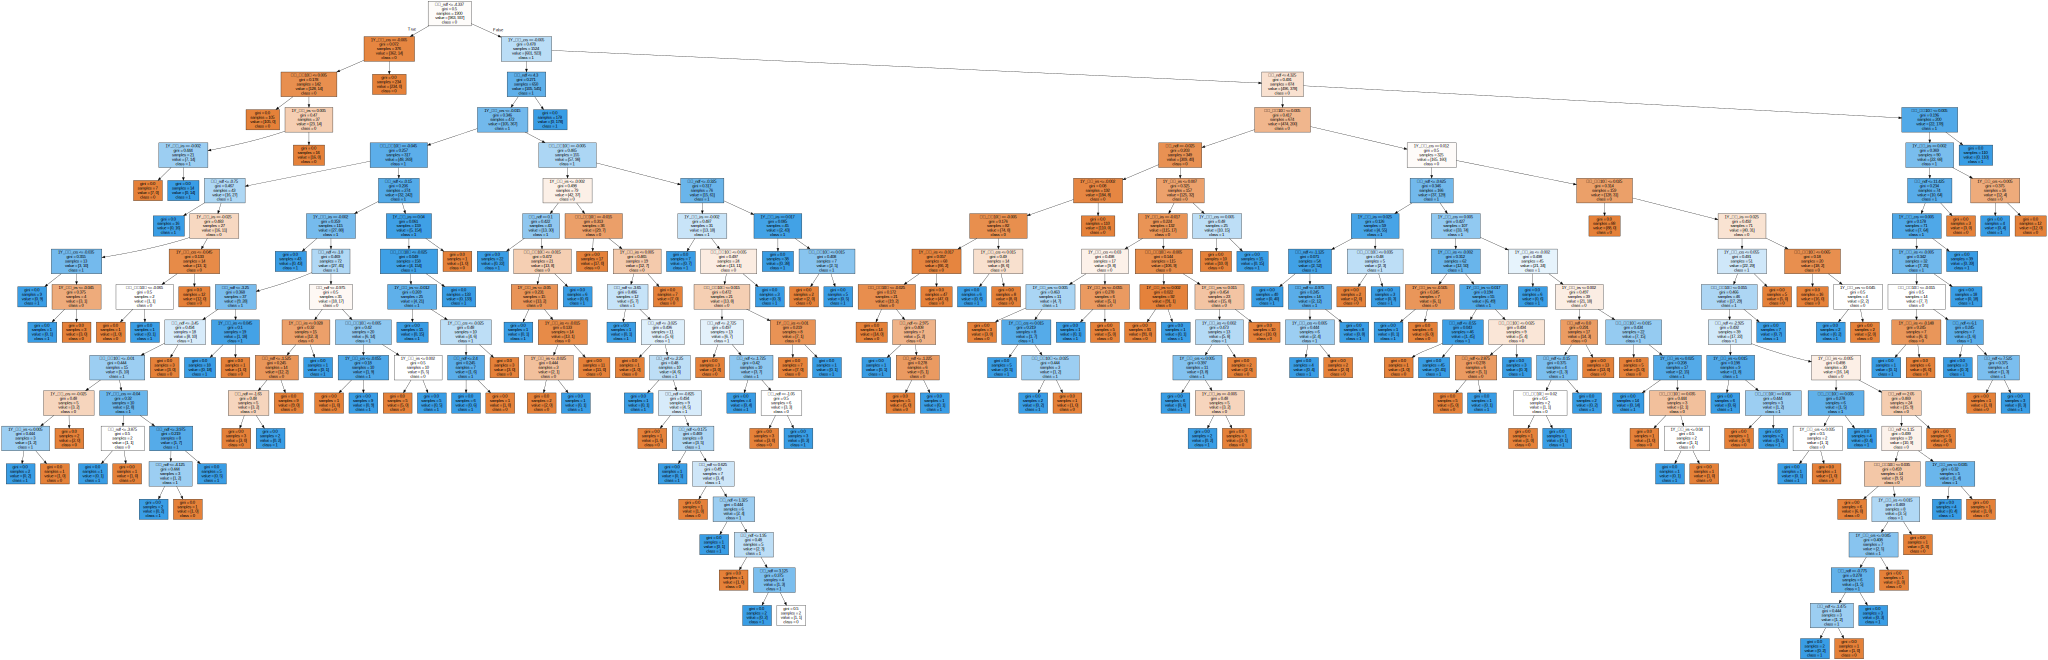

In [12]:
# 트리 그래프 모형
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot",class_names=target_name, feature_names = data.columns, impurity = True, filled= True)

import graphviz

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
#트리 가지치기 
dt_clf_2 = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf_2.fit(X_train, y_train)
print("훈련세트 정학도: {:.3f}".format(dt_clf_2.score(X_train, y_train)))
print("훈련세트 정학도: {:.3f}".format(dt_clf_2.score(X_test, y_test)))

훈련세트 정학도: 0.883
훈련세트 정학도: 0.828


In [14]:
# 트리의 특성 중요도 확인 
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf_2.feature_importances_, 3)))

for name, value in zip(data.columns, dt_clf_2.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

Feature importances:
[0.045 0.309 0.123 0.523]
1Y_대비_irs : 0.045
1Y_대비_crs : 0.309
대비_국고10년 : 0.123
대비_ndf : 0.523


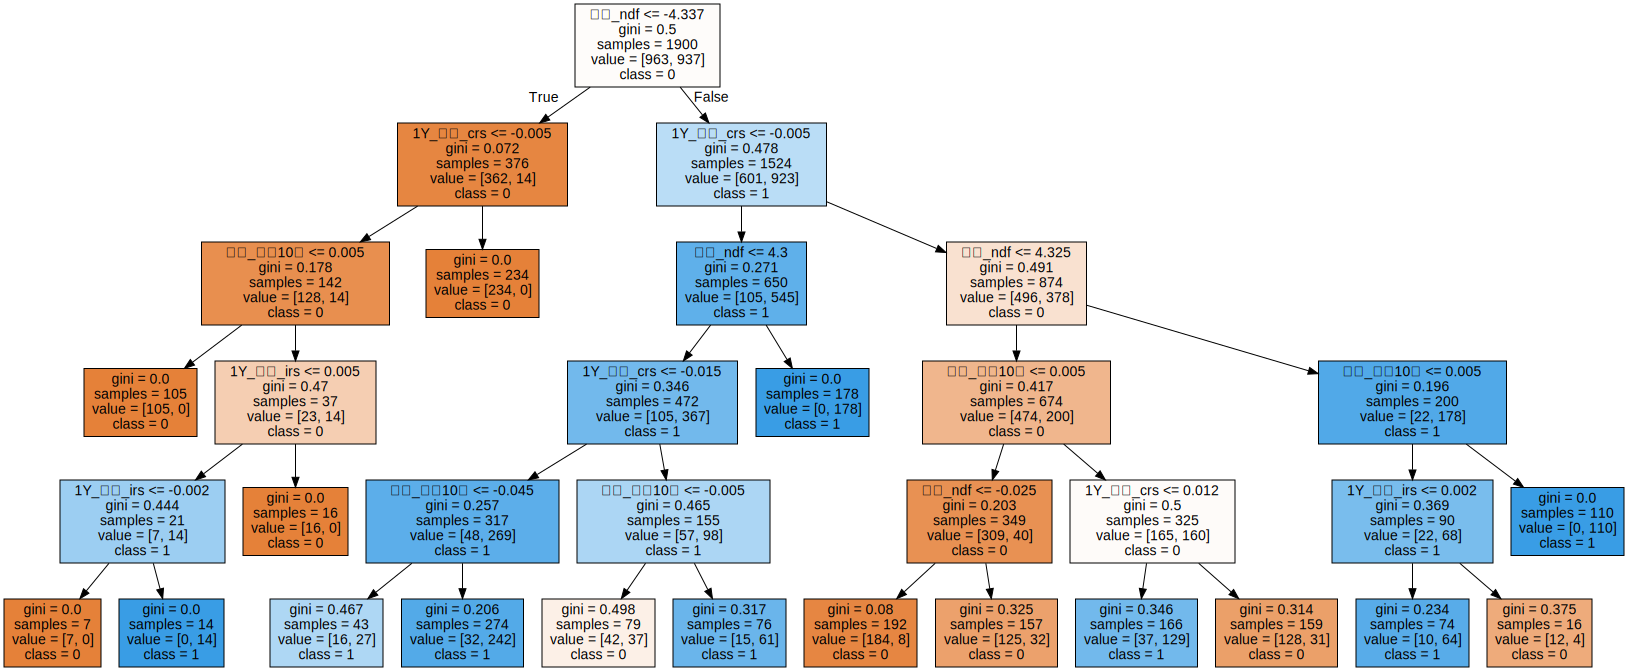

In [15]:
# 트리 그래프 모형
from sklearn.tree import export_graphviz

export_graphviz(dt_clf_2, out_file="tree.dot",class_names=target_name, feature_names = data.columns, impurity = True, filled= True)

import graphviz

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

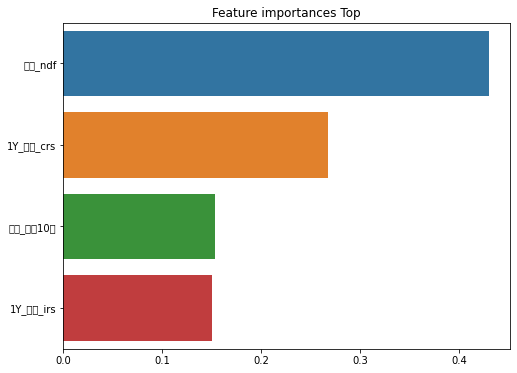

In [16]:
# 디시전트리 피처 중요도 확인 가지치기 전
import matplotlib.pyplot as plt
dt_clf_importances_values = dt_clf.feature_importances_
dt_clf_importances = pd.Series(dt_clf_importances_values, index=X_train.columns)
dt_clf_top = dt_clf_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=dt_clf_top, y=dt_clf_top.index)
plt.show()

In [17]:
len(x)
x[0:2400]

,1Y_대비_irs,1Y_대비_crs,대비_국고10년,대비_ndf,lable
열1,,,,,
1,-0.03,-0.01,-0.04,1.75,0.0
2,-0.03,-0.01,-0.07,4.00,0.0
3,0.02,0.00,0.00,-9.50,0.0
4,0.01,0.02,0.00,0.50,1.0
5,0.01,0.01,-0.02,1.25,1.0
...,...,...,...,...,...
2396,0.04,0.04,-0.02,5.50,0.0
2397,0.03,0.10,0.08,5.60,1.0
2398,0.04,0.08,0.14,-8.40,0.0


In [18]:
from os import scandir
from sklearn.model_selection import cross_val_score
X_train = data[:1900] 
X_test = data[1900:]
y_train = target[:1900]
y_test = target[1900:]
scores = cross_val_score(dt_clf, data, target, cv = 5)
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))
print("교차 검증 점수:", scores)

교차 검증 평균 점수 : 0.92
교차 검증 점수: [0.91056911 0.95121951 0.92682927 0.91463415 0.91242363]


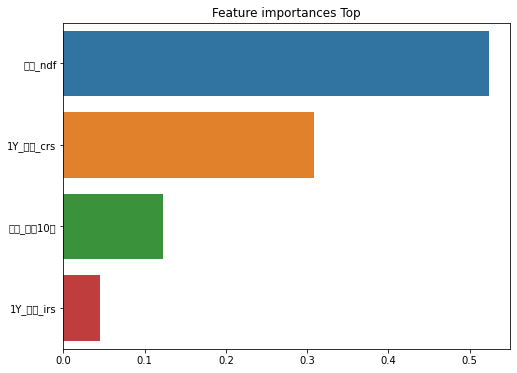

In [19]:
# 디시전트리 피처 중요도 확인 가지치기 후
import matplotlib.pyplot as plt
dt_clf_2_importances_values = dt_clf_2.feature_importances_
dt_clf_2_importances = pd.Series(dt_clf_2_importances_values, index=X_train.columns)
dt_clf_2_top = dt_clf_2_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=dt_clf_2_top, y=dt_clf_2_top.index)
plt.show()

In [20]:
# 결정트리 예측 정확도
from sklearn.metrics import accuracy_score
dt_clf_2 =DecisionTreeClassifier(random_state=0)
dt_clf_2.fit(X_train, y_train)
pred = dt_clf_2.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print("결정 트리 예측 정확도: {0:4f}".format(accuracy))

결정 트리 예측 정확도: 0.915921


In [21]:
# 검증 데이터 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score 

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도 : {1:4f}, 재현율:{2:.4f},F1 스코어: {0:4f}'.format(accuracy, precision, recall, f1))
   
    

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import Binarizer

%matplotlib inline
# 임계값 관련 함수
def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label ='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        


In [23]:
# 랜덤 포레스트 
from random import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(random_state=0)
X_train = data[:1900] 
X_test = data[1900:]
y_train = target[:1900]
y_test = target[1900:]

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print("랜덤 포레스트 정확도:{0:.4f}".format(accuracy))

랜덤 포레스트 정확도:0.9284


In [24]:
# 랜덤포레스트의 최적 하이퍼 파라미터 
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100],
        'max_depth' :[6,8,10,12],
        'min_samples_leaf':[8,12,18],
        'min_samples_split':[8,16,20]
        }
grid_cv = GridSearchCV(rf_clf, param_grid =params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'. format (grid_cv.best_score_))


최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8916


In [25]:
#최적 파라미터로 표현된 랜덤포레스트 정확도

rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth= 12, min_samples_leaf= 8, min_samples_split= 8,  random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.8640


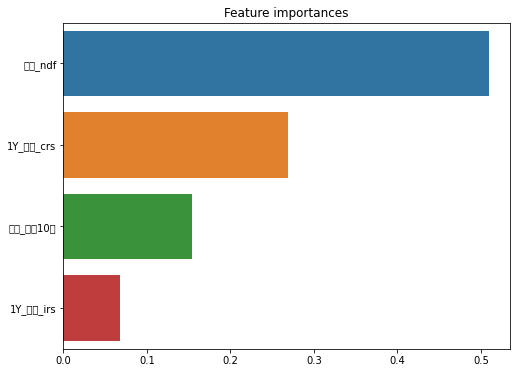

In [26]:
#랜덤 포레스트 피처 중요도 그래프
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [27]:
# 여러가지 종류의 검증 데이터
get_clf_eval(y_test, rf_pred)

오차행렬
[[265  22]
 [ 18 254]]
정확도: 0.928444, 정밀도 : 0.920290, 재현율:0.9338,F1 스코어: 0.928444


In [28]:
scores = cross_val_score(rf_clf1, data, target)
print("교차검증 점수:", scores)
print("교차검증 평균 점수:{:.2f}".format(scores.mean()))

교차검증 점수: [0.91056911 0.90853659 0.88211382 0.9004065  0.87372709]
교차검증 평균 점수:0.90


In [29]:
pred_proba = rf_clf1.predict_proba(X_test)
pred = rf_clf1.predict(X_test)
print('pred_proba()결과 Shape: {0}'. format(pred_proba.shape))
print('pred_proba array 에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape: (559, 2)
pred_proba array 에서 앞 3개만 샘플로 추출
: [[0.61028605 0.38971395]
 [1.         0.        ]
 [0.97541765 0.02458235]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.61028605 0.38971395 0.        ]
 [1.         0.         0.        ]
 [0.97541765 0.02458235 0.        ]]


In [30]:
thresholds = [0.45,0.5,0.55,0.60,0.65,0.7,0.75]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test , pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.45
오차행렬
[[238  49]
 [ 32 240]]
정확도: 0.855098, 정밀도 : 0.830450, 재현율:0.8824,F1 스코어: 0.855098
임곗값: 0.5
오차행렬
[[249  38]
 [ 38 234]]
정확도: 0.864043, 정밀도 : 0.860294, 재현율:0.8603,F1 스코어: 0.864043
임곗값: 0.55
오차행렬
[[255  32]
 [ 41 231]]
정확도: 0.869410, 정밀도 : 0.878327, 재현율:0.8493,F1 스코어: 0.869410
임곗값: 0.6
오차행렬
[[270  17]
 [ 43 229]]
정확도: 0.892665, 정밀도 : 0.930894, 재현율:0.8419,F1 스코어: 0.892665
임곗값: 0.65
오차행렬
[[274  13]
 [ 50 222]]
정확도: 0.887299, 정밀도 : 0.944681, 재현율:0.8162,F1 스코어: 0.887299
임곗값: 0.7
오차행렬
[[279   8]
 [ 58 214]]
정확도: 0.881932, 정밀도 : 0.963964, 재현율:0.7868,F1 스코어: 0.881932
임곗값: 0.75
오차행렬
[[284   3]
 [ 65 207]]
정확도: 0.878354, 정밀도 : 0.985714, 재현율:0.7610,F1 스코어: 0.878354


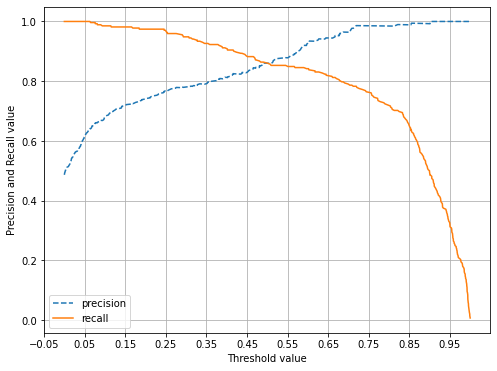

In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label ='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:,1])

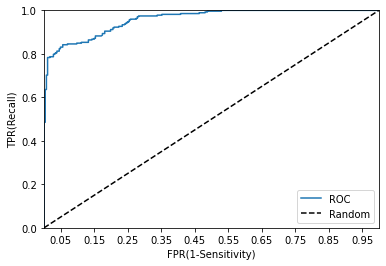

ROC AUC값: 0.9586


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:,1])
pred_proba = rf_clf1.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

In [33]:
# GBM 모델 구현
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()
X_train = data[:1900] 
X_test = data[1900:]
y_train = target[:1900]
y_test = target[1900:]
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행시간: {0:.1f} 초". format(time.time()- start_time))

GBM 정확도: 0.8801
GBM 수행시간: 0.4 초


In [34]:
# GBM 최적 파라미터 확인
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,500],
          'learning_rate':[0.05,0.1]}

grid_clf = GridSearchCV(gb_clf, param_grid=params, verbose=1, cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 하이퍼 파라미어:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8916


In [35]:
# 그라디언트 최적 파라미터 적용
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))

GBM 정확도:0.8605


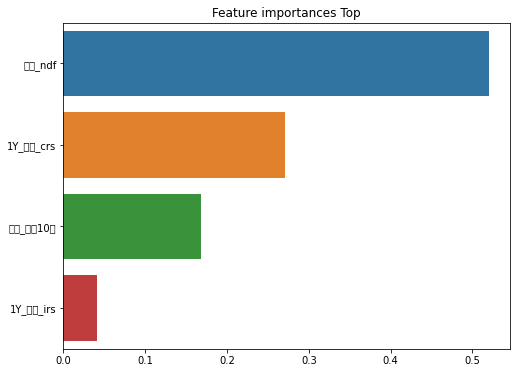

In [36]:
# GBM 피처 중요도 확인
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [37]:
# gbm 오차행렬
get_clf_eval(y_test, gb_pred)

오차행렬
[[248  39]
 [ 39 233]]
정확도: 0.860465, 정밀도 : 0.856618, 재현율:0.8566,F1 스코어: 0.860465


In [38]:
# gbm 교차검증 
scores = cross_val_score(gb_clf, data, target)
print("교차검증 점수:", scores)
print("교차검증 평균 점수:{:.2f}".format(scores.mean()))

교차검증 점수: [0.8800813  0.91056911 0.88617886 0.88617886 0.88594705]
교차검증 평균 점수:0.89


In [39]:
pred_proba = gb_clf.predict_proba(X_test)
pred = gb_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'. format(pred_proba.shape))
print('pred_proba array 에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape: (559, 2)
pred_proba array 에서 앞 3개만 샘플로 추출
: [[0.70269111 0.29730889]
 [0.99260489 0.00739511]
 [0.98281936 0.01718064]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.70269111 0.29730889 0.        ]
 [0.99260489 0.00739511 0.        ]
 [0.98281936 0.01718064 0.        ]]


In [40]:
thresholds = [0.45,0.5,0.55,0.60,0.65,0.7,0.75]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test , pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.45
오차행렬
[[244  43]
 [ 31 241]]
정확도: 0.867621, 정밀도 : 0.848592, 재현율:0.8860,F1 스코어: 0.867621
임곗값: 0.5
오차행렬
[[256  31]
 [ 36 236]]
정확도: 0.880143, 정밀도 : 0.883895, 재현율:0.8676,F1 스코어: 0.880143
임곗값: 0.55
오차행렬
[[263  24]
 [ 40 232]]
정확도: 0.885510, 정밀도 : 0.906250, 재현율:0.8529,F1 스코어: 0.885510
임곗값: 0.6
오차행렬
[[263  24]
 [ 47 225]]
정확도: 0.872987, 정밀도 : 0.903614, 재현율:0.8272,F1 스코어: 0.872987
임곗값: 0.65
오차행렬
[[263  24]
 [ 57 215]]
정확도: 0.855098, 정밀도 : 0.899582, 재현율:0.7904,F1 스코어: 0.855098
임곗값: 0.7
오차행렬
[[268  19]
 [ 64 208]]
정확도: 0.851521, 정밀도 : 0.916300, 재현율:0.7647,F1 스코어: 0.851521
임곗값: 0.75
오차행렬
[[274  13]
 [ 71 201]]
정확도: 0.849732, 정밀도 : 0.939252, 재현율:0.7390,F1 스코어: 0.849732


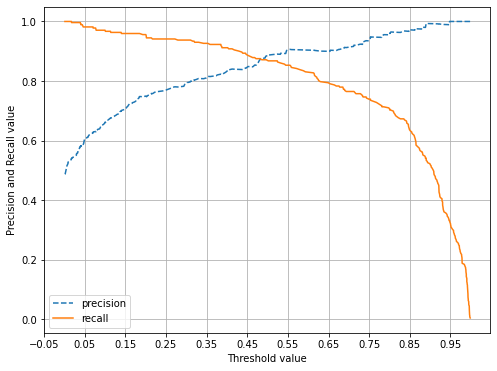

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label ='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, gb_clf.predict_proba(X_test)[:,1])

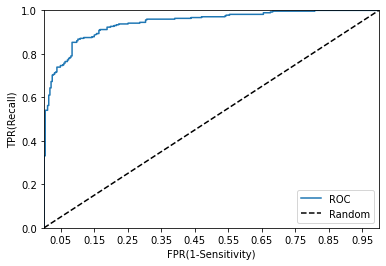

ROC AUC값: 0.9433


In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, gb_clf.predict_proba(X_test)[:,1])
pred_proba = gb_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

In [43]:
# 로지스틱 회귀를 위한 데이터 설정
x_LR = df[["1Y_대비_irs", "1Y_대비_crs",	"대비_국고10년","대비_ndf"]]
y_LR = x["lable"]
y_LR

열1
1       0.0
2       0.0
3       0.0
4       1.0
5       1.0
       ... 
2455    1.0
2456    0.0
2457    0.0
2458    0.0
2459    0.0
Name: lable, Length: 2459, dtype: float64

In [44]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 위한 스케일링 
scaler = StandardScaler()
x_LR_scaled = scaler.fit_transform(x_LR)
df_scaled = pd.DataFrame (data = x_LR_scaled, columns=x_LR.columns)
df_scaled.index = x_LR.index

data = df_scaled[['1Y_대비_irs','1Y_대비_crs',"대비_국고10년","대비_ndf"]]
target = y_LR
X_train = data[:1900] 
X_test = data[1900:]
y_train = target[:1900]
y_test = target[1900:]


lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred)
print('accuracy: {:0.4f}'.format(accuracy_score(y_test,lr_pred)))
print('rou_auc: {:0.4f}'.format(roc_auc_score(y_test,lr_pred)))

오차행렬
[[256  31]
 [ 36 236]]
정확도: 0.880143, 정밀도 : 0.883895, 재현율:0.8676,F1 스코어: 0.880143
accuracy: 0.7979
rou_auc: 0.7965


In [45]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(data,target)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.807


In [46]:
get_clf_eval(y_test, lr_pred)

오차행렬
[[243  44]
 [ 69 203]]
정확도: 0.797853, 정밀도 : 0.821862, 재현율:0.7463,F1 스코어: 0.797853


In [47]:
from sklearn.preprocessing import LabelBinarizer

# def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
#     for custom_threshold in thresholds:
#         binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
#         custom_predict = binarizer.transform(pred_proba_c1)
#         print("임곗값:", custom_threshold)
#         get_clf_eval(y_test, custom_predict)

In [48]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'. format(pred_proba.shape))
print('pred_proba array 에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape: (559, 2)
pred_proba array 에서 앞 3개만 샘플로 추출
: [[0.85348879 0.14651121]
 [0.97932217 0.02067783]
 [0.98189641 0.01810359]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.85348879 0.14651121 0.        ]
 [0.97932217 0.02067783 0.        ]
 [0.98189641 0.01810359 0.        ]]


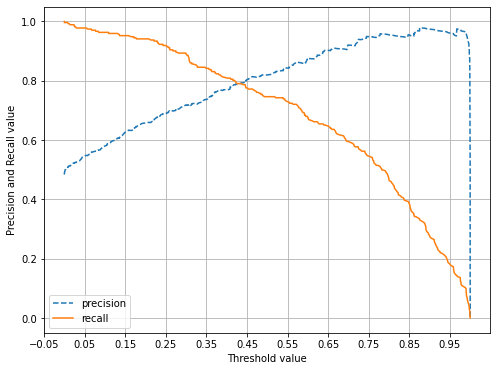

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label ='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [50]:
# 로지스틱 
thresholds = [0.45,0.5,0.55,0.60,0.65,0.7,0.75]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.45
오차행렬
[[236  51]
 [ 61 211]]
정확도: 0.799642, 정밀도 : 0.805344, 재현율:0.7757,F1 스코어: 0.799642
임곗값: 0.5
오차행렬
[[243  44]
 [ 69 203]]
정확도: 0.797853, 정밀도 : 0.821862, 재현율:0.7463,F1 스코어: 0.797853
임곗값: 0.55
오차행렬
[[250  37]
 [ 74 198]]
정확도: 0.801431, 정밀도 : 0.842553, 재현율:0.7279,F1 스코어: 0.801431
임곗값: 0.6
오차행렬
[[260  27]
 [ 88 184]]
정확도: 0.794275, 정밀도 : 0.872038, 재현율:0.6765,F1 스코어: 0.794275
임곗값: 0.65
오차행렬
[[268  19]
 [ 96 176]]
정확도: 0.794275, 정밀도 : 0.902564, 재현율:0.6471,F1 스코어: 0.794275
임곗값: 0.7
오차행렬
[[273  14]
 [111 161]]
정확도: 0.776386, 정밀도 : 0.920000, 재현율:0.5919,F1 스코어: 0.776386
임곗값: 0.75
오차행렬
[[279   8]
 [124 148]]
정확도: 0.763864, 정밀도 : 0.948718, 재현율:0.5441,F1 스코어: 0.763864


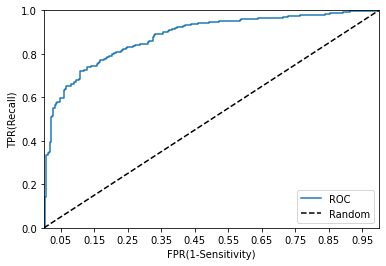

ROC AUC값: 0.8807


In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

In [52]:
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

# 데이터와 라벨 구분
x_1 =x[["1Y_대비_irs","1Y_대비_crs", "대비_국고10년","대비_ndf"]]
y_1 =x["lable"]

# 모델 설정및 실행
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_1,y_1, epochs=100)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import os

np.random.seed(3)
tf.random.set_seed(3)

# 데이터와 라벨 구분
x_1 =x[["1Y_대비_irs","1Y_대비_crs", "대비_국고10년","대비_ndf"]]
y_1 =x["lable"]

X_train = x_1[:2000] 
X_test = y_1[2000:]
y_train = x_1[:2000]
y_test = y_1[2000:]

# 모델 설정및 실행
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_1,y_1, epochs=100)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',vervose=1, save_best_only=True)

history = model.fit(x_1,y_1, validation_split=0.33, epochs=500, batch_size=500)
history

early_stopping_callback = EarlyStopping(monitor ='val_loss', patience = 10 )

Epoch 1/100
77/77 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.6604
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.6816
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.6808
Epoch 4/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.6816
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.6812
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6816
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6816
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.6820
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6832
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6800
Epoch 11/

In [ ]:
# loss : 학습셋 오차
# accuracy : 학습셋 정확도
# val_loss : 테스트셋 오차
# val_accuracy : 테스트셋 정확도

history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

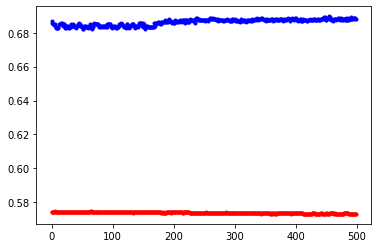

In [ ]:
# 오차 와 정확도 그래프
y_vloss = history.history['val_loss']

y_acc = history.history["accuracy"]

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c= "red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()